In [125]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# importar archivos csv
brawlerStats = pd.read_csv('datasets/brawlers/brawlers_stats.csv', index_col=0)

crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)

In [127]:
# merge cada brawler con la base final

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player1.brawler.'), how='left', left_on='battle.team1.player1.brawler.id', right_on='battle.team1.player1.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player2.brawler.'), how='left', left_on='battle.team1.player2.brawler.id', right_on='battle.team1.player2.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team1.player3.brawler.'), how='left', left_on='battle.team1.player3.brawler.id', right_on='battle.team1.player3.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player1.brawler.'), how='left', left_on='battle.team2.player1.brawler.id', right_on='battle.team2.player1.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player2.brawler.'), how='left', left_on='battle.team2.player2.brawler.id', right_on='battle.team2.player2.brawler.id')

crossBattlelog = pd.merge(crossBattlelog, brawlerStats[['id', 'role', 'range', 'speed', 'health']].add_prefix('battle.team2.player3.brawler.'), how='left', left_on='battle.team2.player3.brawler.id', right_on='battle.team2.player3.brawler.id')

crossBattlelog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16814 entries, 0 to 16813
Data columns (total 76 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playertag                              16814 non-null  object 
 1   battle_time                            16814 non-null  object 
 2   event.id                               16814 non-null  int64  
 3   event.mode                             15683 non-null  object 
 4   event.map                              16814 non-null  object 
 5   battle.mode                            16814 non-null  object 
 6   battle.type                            16814 non-null  object 
 7   battle.result                          16814 non-null  object 
 8   battle.duration                        16814 non-null  float64
 9   battle.trophy_change                   11686 non-null  float64
 10  battle.star_player.tag                 14518 non-null  object 
 11  ba

In [128]:
# crear columna teamcomp
def create_list(row, team):
    return [row['battle.' + team + '.player1.brawler.role'], row['battle.' + team + '.player2.brawler.role'], row['battle.' + team + '.player3.brawler.role']]

crossBattlelog['battle.team1.comp'] = crossBattlelog.apply(lambda row: create_list(row, 'team1'), axis=1)

crossBattlelog['battle.team2.comp'] = crossBattlelog.apply(lambda row: create_list(row, 'team2'), axis=1)

crossBattlelog[['battle.team1.comp','battle.team2.comp']]

,battle.team1.comp,battle.team2.comp
0,"[ranged dps, sniper, assassin]","[tank, close quarters, tank stopper]"
1,"[ranged dps, sniper, assassin]","[tank, close quarters, assassin]"
2,"[ranged dps, area control, assassin]","[ranged dps, sniper, assassin]"
3,"[assassin, healer, assassin]","[assassin, ranged dps, sniper]"
4,"[assassin, close quarters, thrower]","[area control, assassin, sniper]"
...,...,...
16809,"[area control, assassin, area control]","[assassin, tank, sniper]"
16810,"[close quarters, healer, ranged dps]","[area control, close quarters, ranged dps]"
16811,"[area control, assassin, ranged dps]","[area control, area control, assassin]"
16812,"[area control, ranged dps, sniper]","[healer, area control, assassin]"


In [129]:
# ordena filas de teamcomp por nombre
crossBattlelog['battle.team1.comp'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team1.comp']]
crossBattlelog['battle.team2.comp'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team2.comp']]

crossBattlelog[['battle.team1.comp','battle.team2.comp']]

,battle.team1.comp,battle.team2.comp
0,"['assassin', 'ranged dps', 'sniper']","['close quarters', 'tank', 'tank stopper']"
1,"['assassin', 'ranged dps', 'sniper']","['assassin', 'close quarters', 'tank']"
2,"['area control', 'assassin', 'ranged dps']","['assassin', 'ranged dps', 'sniper']"
3,"['assassin', 'assassin', 'healer']","['assassin', 'ranged dps', 'sniper']"
4,"['assassin', 'close quarters', 'thrower']","['area control', 'assassin', 'sniper']"
...,...,...
16809,"['area control', 'area control', 'assassin']","['assassin', 'sniper', 'tank']"
16810,"['close quarters', 'healer', 'ranged dps']","['area control', 'close quarters', 'ranged dps']"
16811,"['area control', 'assassin', 'ranged dps']","['area control', 'area control', 'assassin']"
16812,"['area control', 'ranged dps', 'sniper']","['area control', 'assassin', 'healer']"


In [130]:
# crear columna teambrawlers
def create_list(row, team):
    return [row['battle.' + team + '.player1.brawler.name'], row['battle.' + team + '.player2.brawler.name'], row['battle.' + team + '.player3.brawler.name']]

crossBattlelog['battle.team1.brawlers'] = crossBattlelog.apply(lambda row: create_list(row, 'team1'), axis=1)

crossBattlelog['battle.team2.brawlers'] = crossBattlelog.apply(lambda row: create_list(row, 'team2'), axis=1)

crossBattlelog[['battle.team1.brawlers','battle.team2.brawlers']]

,battle.team1.brawlers,battle.team2.brawlers
0,"[GRIFF, BEA, CHESTER]","[JACKY, EL PRIMO, SHELLY]"
1,"[GRIFF, BEA, CHESTER]","[JACKY, BULL, DARRYL]"
2,"[SPIKE, NITA, CHESTER]","[GRIFF, BEA, CHESTER]"
3,"[MORTIS, POCO, SURGE]","[CHESTER, GRIFF, BEA]"
4,"[SURGE, BUZZ, GROM]","[PENNY, CHESTER, MANDY]"
...,...,...
16809,"[BIBI, COLETTE, CROW]","[STU, ASH, BEA]"
16810,"[EDGAR, POCO, SPIKE]","[LOU, BULL, LOLA]"
16811,"[GENE, SURGE, SPIKE]","[JESSIE, CROW, CHESTER]"
16812,"[BO, LOLA, BROCK]","[GUS, BUSTER, CHESTER]"


In [131]:
# ordena filas de teambrawlers por nombre
crossBattlelog['battle.team1.brawlers'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team1.brawlers']]
crossBattlelog['battle.team2.brawlers'] = [str(sorted(roles)) for roles in crossBattlelog['battle.team2.brawlers']]

crossBattlelog[['battle.team1.brawlers','battle.team2.brawlers']]

,battle.team1.brawlers,battle.team2.brawlers
0,"['BEA', 'CHESTER', 'GRIFF']","['EL PRIMO', 'JACKY', 'SHELLY']"
1,"['BEA', 'CHESTER', 'GRIFF']","['BULL', 'DARRYL', 'JACKY']"
2,"['CHESTER', 'NITA', 'SPIKE']","['BEA', 'CHESTER', 'GRIFF']"
3,"['MORTIS', 'POCO', 'SURGE']","['BEA', 'CHESTER', 'GRIFF']"
4,"['BUZZ', 'GROM', 'SURGE']","['CHESTER', 'MANDY', 'PENNY']"
...,...,...
16809,"['BIBI', 'COLETTE', 'CROW']","['ASH', 'BEA', 'STU']"
16810,"['EDGAR', 'POCO', 'SPIKE']","['BULL', 'LOLA', 'LOU']"
16811,"['GENE', 'SPIKE', 'SURGE']","['CHESTER', 'CROW', 'JESSIE']"
16812,"['BO', 'BROCK', 'LOLA']","['BUSTER', 'CHESTER', 'GUS']"


In [132]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team2    8522
team1    8292
Name: player_team, dtype: int64

In [133]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    8371
team2    8368
draw       75
Name: winner_team, dtype: int64

In [134]:
# agregar columna identificando batallas levelup y definir subset
for i in range(len(crossBattlelog)):

	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

	if  (t1p1 <= 500 or t1p2 <= 500 or t1p3 <= 500 or t2p1 <= 500 or t2p2 <= 500 or t2p3 <= 500):
		crossBattlelog.loc[i, 'low_trophy'] = 'y'
	else:
		crossBattlelog.loc[i, 'low_trophy'] = 'n'

crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n']

crossBattlelog.shape

(11282, 83)

In [135]:
# unificar bases de teams
# renombrar columnas de crossBattlelog
bl1 = crossBattlelog.rename(columns={'battle.team1.comp': 'teamcomp', 'battle.team1.brawlers': 'teambrawlers'})
bl2 = crossBattlelog.rename(columns={'battle.team2.comp': 'teamcomp', 'battle.team2.brawlers': 'teambrawlers'})
bk1 = crossBattlelog.rename(columns={'battle.team1.player1.brawler.name': 'brawlername'})
bk2 = crossBattlelog.rename(columns={'battle.team1.player2.brawler.name': 'brawlername'})
bk3 = crossBattlelog.rename(columns={'battle.team1.player3.brawler.name': 'brawlername'})
bk4 = crossBattlelog.rename(columns={'battle.team2.player1.brawler.name': 'brawlername'})
bk5 = crossBattlelog.rename(columns={'battle.team2.player2.brawler.name': 'brawlername'})
bk6 = crossBattlelog.rename(columns={'battle.team2.player3.brawler.name': 'brawlername'})

# Concatenar DataFrames y renombrar columnas
teamComp = pd.concat([bl1[['playertag','player_team','teamcomp','winner_team']], bl2[['playertag','player_team','teamcomp','winner_team']]], ignore_index=True)

brawlerComp = pd.concat([bl1[['playertag','player_team','teambrawlers','winner_team']], bl2[['playertag','player_team','teambrawlers','winner_team']]], ignore_index=True)

brawler = pd.concat([
bk1[['playertag','player_team','brawlername','winner_team']], 
bk2[['playertag','player_team','brawlername','winner_team']], 
bk3[['playertag','player_team','brawlername','winner_team']], 
bk4[['playertag','player_team','brawlername','winner_team']], 
bk5[['playertag','player_team','brawlername','winner_team']], 
bk6[['playertag','player_team','brawlername','winner_team']]
], ignore_index=True)

brawler

,playertag,player_team,brawlername,winner_team
0,#JGCCGY80,team1,GRIFF,team1
1,#JGCCGY80,team1,GRIFF,team1
2,#JGCCGY80,team2,SPIKE,team2
3,#JGCCGY80,team2,MORTIS,team2
4,#JGCCGY80,team2,SURGE,team2
...,...,...,...,...
67687,#2Y2Y99GQR,team2,SQUEAK,team2
67688,#2222VVG82,team2,CHESTER,team1
67689,#CPL9PLC8,team2,GRAY,team2
67690,#29Q9GGJG,team2,BEA,team2


In [136]:
# crear pivot table con los team comp
pivotTeamComp = teamComp.pivot_table(index=['teamcomp','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

pivotBrawlerComp = brawlerComp.pivot_table(index=['teambrawlers','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

pivotBrawler = brawler.pivot_table(index=['brawlername','player_team'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

In [137]:
# reset indexes
pivotTeamComp.reset_index(drop=False, inplace=True)
pivotBrawlerComp.reset_index(drop=False, inplace=True)
pivotBrawler.reset_index(drop=False, inplace=True)

In [138]:
# agregar columna totales, win y draw
pivotTeamComp['total_games'] = pivotTeamComp['draw'] + pivotTeamComp['team1'] + pivotTeamComp['team2']

for i in range(len(pivotTeamComp)):
	pivotTeamComp.loc[i, 'total_draws'] = pivotTeamComp.loc[i, 'draw']
	if pivotTeamComp.loc[i, 'player_team'] == 'team1':
		pivotTeamComp.loc[i, 'total_wins'] = pivotTeamComp.loc[i, 'team1']
	elif pivotTeamComp.loc[i, 'player_team'] == 'team2':
		pivotTeamComp.loc[i, 'total_wins'] = pivotTeamComp.loc[i, 'team2']
	else:
		print("error en el procedimiento")

pivotTeamComp

winner_team,teamcomp,player_team,draw,team1,team2,total_games,total_draws,total_wins
0,"['area control', 'area control', 'area control']",team1,2,162,61,225,2.0,162.0
1,"['area control', 'area control', 'area control']",team2,0,40,159,199,0.0,159.0
2,"['area control', 'area control', 'assassin']",team1,0,454,176,630,0.0,454.0
3,"['area control', 'area control', 'assassin']",team2,4,160,497,661,4.0,497.0
4,"['area control', 'area control', 'close quarte...",team1,0,110,34,144,0.0,110.0
...,...,...,...,...,...,...,...,...
282,"['tank', 'tank', 'thrower']",team2,0,0,1,1,0.0,1.0
283,"['tank', 'thrower', 'thrower']",team1,0,4,0,4,0.0,4.0
284,"['tank', 'thrower', 'thrower']",team2,0,0,3,3,0.0,3.0
285,"['thrower', 'thrower', 'thrower']",team1,0,5,0,5,0.0,5.0


In [139]:
# agregar columna totales, win y draw a brawlers comp
pivotBrawlerComp['total_games'] = pivotBrawlerComp['draw'] + pivotBrawlerComp['team1'] + pivotBrawlerComp['team2']

for i in range(len(pivotBrawlerComp)):
	pivotBrawlerComp.loc[i, 'total_draws'] = pivotBrawlerComp.loc[i, 'draw']
	if pivotBrawlerComp.loc[i, 'player_team'] == 'team1':
		pivotBrawlerComp.loc[i, 'total_wins'] = pivotBrawlerComp.loc[i, 'team1']
	elif pivotBrawlerComp.loc[i, 'player_team'] == 'team2':
		pivotBrawlerComp.loc[i, 'total_wins'] = pivotBrawlerComp.loc[i, 'team2']
	else:
		print("error en el procedimiento")

pivotBrawlerComp

winner_team,teambrawlers,player_team,draw,team1,team2,total_games,total_draws,total_wins
0,"['8-BIT', 'AMBER', 'BEA']",team1,0,1,1,2,0.0,1.0
1,"['8-BIT', 'AMBER', 'BROCK']",team1,0,0,1,1,0.0,0.0
2,"['8-BIT', 'AMBER', 'EDGAR']",team1,0,1,0,1,0.0,1.0
3,"['8-BIT', 'AMBER', 'JANET']",team1,0,3,1,4,0.0,3.0
4,"['8-BIT', 'AMBER', 'JANET']",team2,0,1,3,4,0.0,3.0
...,...,...,...,...,...,...,...,...
9935,"['SQUEAK', 'STU', 'TARA']",team1,0,0,1,1,0.0,0.0
9936,"['STU', 'SURGE', 'TARA']",team1,0,1,1,2,0.0,1.0
9937,"['STU', 'SURGE', 'TICK']",team2,0,0,1,1,0.0,1.0
9938,"['STU', 'TARA', 'TARA']",team1,0,1,0,1,0.0,1.0


In [140]:
# agregar columna totales, win y draw a brawlers
pivotBrawler['total_games'] = pivotBrawler['draw'] + pivotBrawler['team1'] + pivotBrawler['team2']

for i in range(len(pivotBrawler)):
	pivotBrawler.loc[i, 'total_draws'] = pivotBrawler.loc[i, 'draw']
	if pivotBrawler.loc[i, 'player_team'] == 'team1':
		pivotBrawler.loc[i, 'total_wins'] = pivotBrawler.loc[i, 'team1']
	elif pivotBrawler.loc[i, 'player_team'] == 'team2':
		pivotBrawler.loc[i, 'total_wins'] = pivotBrawler.loc[i, 'team2']
	else:
		print("error en el procedimiento")

pivotBrawler

winner_team,brawlername,player_team,draw,team1,team2,total_games,total_draws,total_wins
0,8-BIT,team1,1,126,36,163,1.0,126.0
1,8-BIT,team2,0,35,97,132,0.0,97.0
2,AMBER,team1,0,130,53,183,0.0,130.0
3,AMBER,team2,0,60,134,194,0.0,134.0
4,ASH,team1,0,212,94,306,0.0,212.0
...,...,...,...,...,...,...,...,...
123,SURGE,team2,6,169,590,765,6.0,590.0
124,TARA,team1,4,360,142,506,4.0,360.0
125,TARA,team2,5,126,374,505,5.0,374.0
126,TICK,team1,1,499,112,612,1.0,499.0


In [141]:
# agrupar y calcular tasa de victoria team comp
groupTeamComp = pivotTeamComp[['teamcomp','total_games','total_draws','total_wins']].groupby('teamcomp').sum()

groupTeamComp['winrate'] = groupTeamComp['total_wins'] / groupTeamComp['total_games']

groupTeamComp

winner_team,total_games,total_draws,total_wins,winrate
teamcomp,,,,
"['area control', 'area control', 'area control']",424,2.0,321.0,0.757075
"['area control', 'area control', 'assassin']",1291,4.0,951.0,0.736638
"['area control', 'area control', 'close quarters']",310,1.0,222.0,0.716129
"['area control', 'area control', 'healer']",241,0.0,198.0,0.821577
"['area control', 'area control', 'ranged dps']",402,1.0,298.0,0.741294
...,...,...,...,...
"['tank', 'tank stopper', 'thrower']",2,0.0,1.0,0.500000
"['tank', 'tank', 'tank stopper']",1,0.0,1.0,1.000000
"['tank', 'tank', 'thrower']",2,0.0,2.0,1.000000


In [142]:
# agrupar y calcular tasa de victoria brawler comp
groupBrawlerComp = pivotBrawlerComp[['teambrawlers','total_games','total_draws','total_wins']].groupby('teambrawlers').sum()

groupBrawlerComp['winrate'] = groupBrawlerComp['total_wins'] / groupBrawlerComp['total_games']

groupBrawlerComp

winner_team,total_games,total_draws,total_wins,winrate
teambrawlers,,,,
"['8-BIT', 'AMBER', 'BEA']",2,0.0,1.0,0.50
"['8-BIT', 'AMBER', 'BROCK']",1,0.0,0.0,0.00
"['8-BIT', 'AMBER', 'EDGAR']",1,0.0,1.0,1.00
"['8-BIT', 'AMBER', 'JANET']",8,0.0,6.0,0.75
"['8-BIT', 'ASH', 'BARLEY']",1,0.0,1.0,1.00
...,...,...,...,...
"['SQUEAK', 'STU', 'TARA']",1,0.0,0.0,0.00
"['STU', 'SURGE', 'TARA']",2,0.0,1.0,0.50
"['STU', 'SURGE', 'TICK']",1,0.0,1.0,1.00


In [143]:
# agrupar y calcular tasa de victoria brawlers
groupBrawler = pivotBrawler[['brawlername','total_games','total_draws','total_wins']].groupby('brawlername').sum()

groupBrawler['winrate'] = groupBrawler['total_wins'] / groupBrawler['total_games']

groupBrawler

winner_team,total_games,total_draws,total_wins,winrate
brawlername,,,,
8-BIT,295,1.0,223.0,0.755932
AMBER,377,0.0,264.0,0.700265
ASH,626,0.0,441.0,0.704473
BARLEY,792,2.0,635.0,0.801768
BEA,2048,8.0,1574.0,0.768555
...,...,...,...,...
SQUEAK,359,1.0,270.0,0.752089
STU,1614,7.0,1227.0,0.760223
SURGE,1477,9.0,1121.0,0.758971


In [144]:
# reset groupTeamComp index
groupTeamComp = groupTeamComp.sort_values(by='total_games', ascending=False)

groupTeamComp.reset_index(drop=False, inplace=True)

groupTeamComp

winner_team,teamcomp,total_games,total_draws,total_wins,winrate
0,"['area control', 'area control', 'assassin']",1291,4.0,951.0,0.736638
1,"['area control', 'assassin', 'sniper']",1278,7.0,962.0,0.752739
2,"['area control', 'assassin', 'assassin']",1141,10.0,876.0,0.767748
3,"['area control', 'assassin', 'thrower']",918,6.0,717.0,0.781046
4,"['assassin', 'sniper', 'thrower']",831,0.0,636.0,0.765343
...,...,...,...,...,...
144,"['healer', 'healer', 'ranged dps']",1,0.0,0.0,0.000000
145,"['tank', 'tank', 'tank stopper']",1,0.0,1.0,1.000000
146,"['sniper', 'sniper', 'tank stopper']",1,0.0,0.0,0.000000
147,"['healer', 'healer', 'tank stopper']",1,0.0,0.0,0.000000


In [145]:
# reset groupBrawlerComp index
groupBrawlerComp = groupBrawlerComp.sort_values(by='total_games', ascending=False)

groupBrawlerComp.reset_index(drop=False, inplace=True)

groupBrawlerComp

winner_team,teambrawlers,total_games,total_draws,total_wins,winrate
0,"['BUSTER', 'CHESTER', 'MANDY']",138,0.0,109.0,0.789855
1,"['BUZZ', 'CHESTER', 'MANDY']",116,2.0,106.0,0.913793
2,"['BELLE', 'GROM', 'PIPER']",101,0.0,82.0,0.811881
3,"['NANI', 'PIPER', 'TICK']",88,0.0,66.0,0.750000
4,"['BEA', 'CHESTER', 'STU']",88,1.0,71.0,0.806818
...,...,...,...,...,...
7712,"['BIBI', 'DARRYL', 'SANDY']",1,0.0,1.0,1.000000
7713,"['BIBI', 'DARRYL', 'OTIS']",1,0.0,1.0,1.000000
7714,"['CHESTER', 'GRIFF', 'LOLA']",1,0.0,0.0,0.000000
7715,"['CHESTER', 'GRIFF', 'LOU']",1,0.0,0.0,0.000000


In [146]:
# reset groupBrawler index
groupBrawler = groupBrawler.sort_values(by='total_games', ascending=False)

groupBrawler.reset_index(drop=False, inplace=True)

groupBrawler

winner_team,brawlername,total_games,total_draws,total_wins,winrate
0,CHESTER,5050,28.0,3861.0,0.764554
1,GROM,2645,9.0,1921.0,0.726276
2,BUSTER,2485,11.0,1860.0,0.748491
3,PIPER,2132,4.0,1566.0,0.734522
4,MORTIS,2059,8.0,1509.0,0.732880
...,...,...,...,...,...
59,LOU,267,0.0,176.0,0.659176
60,MEG,260,0.0,201.0,0.773077
61,SANDY,259,0.0,196.0,0.756757
62,ROSA,250,0.0,191.0,0.764000


In [147]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


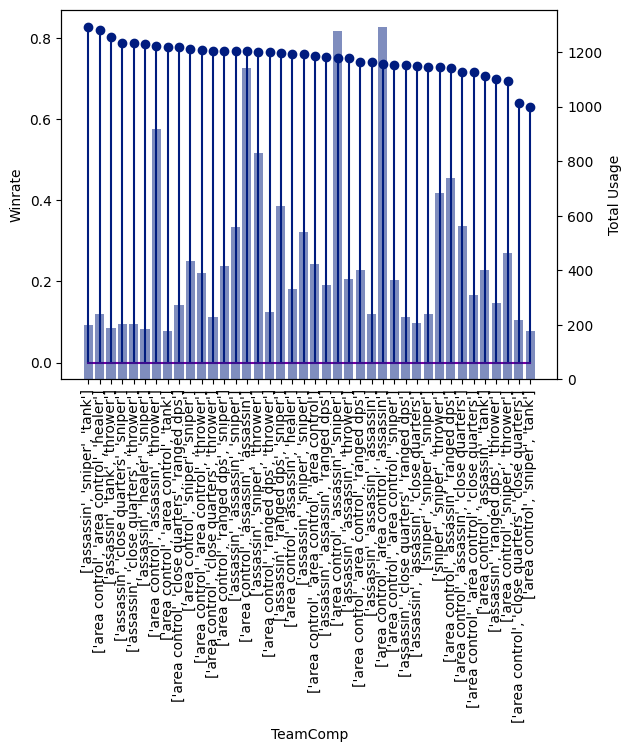

In [148]:
#grafico de teamcomp
teamCompTop = groupTeamComp[0:40]

teamCompTop = teamCompTop.sort_values(by='winrate', ascending=False)

# Crea una instancia de Axes y la almacena en la variable 'ax'
ax = plt.axes()

ax.stem(teamCompTop['teamcomp'],teamCompTop['winrate'])

plt.xticks(rotation=90)

twin_axes = ax.twinx()

twin_axes.bar(teamCompTop['teamcomp'],teamCompTop['total_games'],alpha=0.5)

# Establece etiquetas para cada eje
ax.set_xlabel('TeamComp')
ax.set_ylabel('Winrate')
twin_axes.set_ylabel('Total Usage')

# Muestra el gráfico
plt.show()

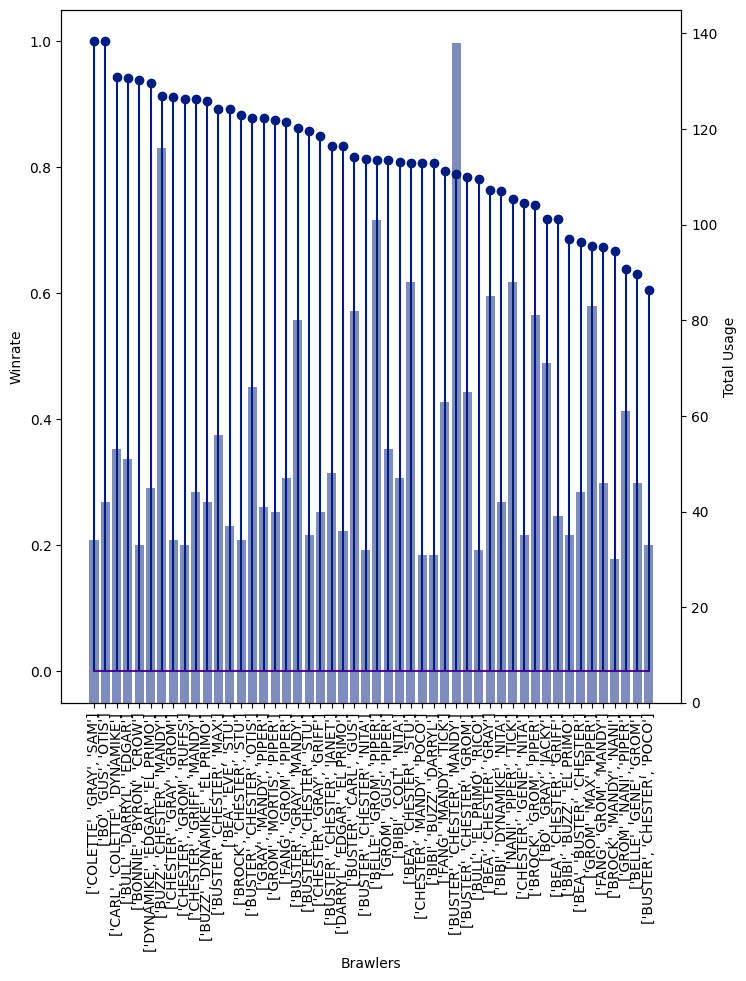

In [151]:
# gráfico por composicion de brawler en equipo
brawlerCompTop = groupBrawlerComp[0:50]

brawlerCompTop = brawlerCompTop.sort_values(by='winrate', ascending=False)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ax = plt.axes()

ax.stem(brawlerCompTop['teambrawlers'],brawlerCompTop['winrate'])

plt.xticks(rotation=90)

twin_axes = ax.twinx()

twin_axes.bar(brawlerCompTop['teambrawlers'],brawlerCompTop['total_games'],alpha=0.5)

# Establece etiquetas para cada eje
ax.set_xlabel('Brawlers')
ax.set_ylabel('Winrate')
twin_axes.set_ylabel('Total Usage')

# Muestra el gráfico
plt.show()

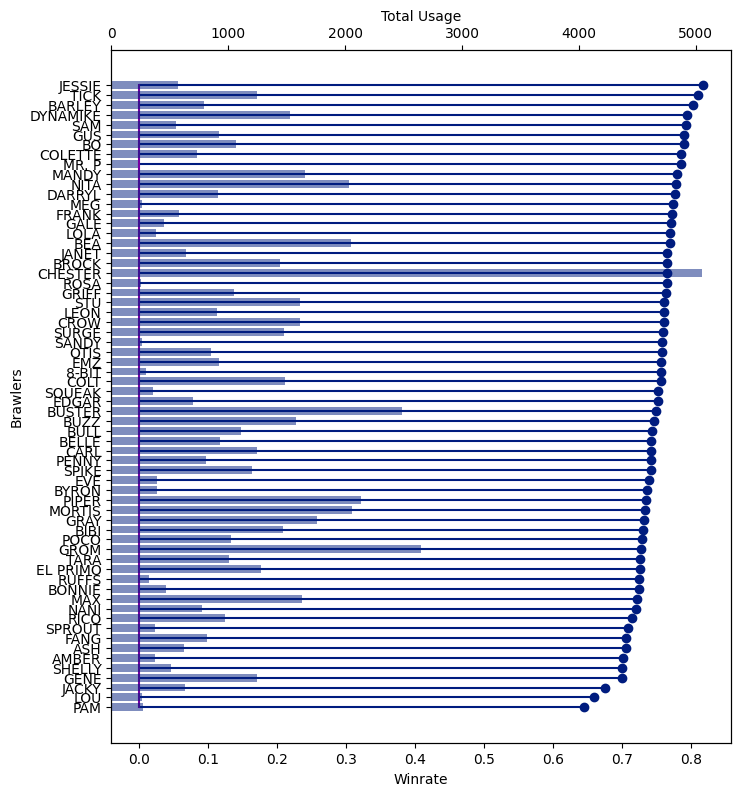

In [150]:
# gráfico por composicion de brawler en equipo
brawlerTop = groupBrawler[:]

brawlerTop = brawlerTop.sort_values(by='winrate', ascending=True)

# Crea una instancia de Axes y la almacena en la variable 'ax'
plt.figure(figsize=(8, 9))

ay = plt.axes()

ay.stem(brawlerTop['brawlername'], brawlerTop['winrate'], orientation='horizontal')

#plt.yticks(rotation=90)

twin_axes = ay.twiny()

twin_axes.barh(brawlerTop['brawlername'], brawlerTop['total_games'], alpha=0.5)

# Establece etiquetas para cada eje
ay.set_xlabel('Winrate')
ay.set_ylabel('Brawlers')
twin_axes.set_xlabel('Total Usage')

# Muestra el gráfico
plt.show()